In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, log_loss, accuracy_score
from sklearn.model_selection import train_test_split

directory = '../input/5-celebrity-faces-dataset/train/'

Name=[]
for file in os.listdir(directory):
    Name+=[file]
print(Name)
print(len(Name))

N=[]
for i in range(len(Name)):
    N+=[i]
    
normal_mapping=dict(zip(Name,N)) 
reverse_mapping=dict(zip(N,Name)) 

dataset=[]
# testset=[]
count=0
for file in os.listdir(directory):
    path=os.path.join(directory,file)
    t=0
    for im in os.listdir(path):
        image=load_img(os.path.join(path,im), grayscale=False, color_mode='rgb', target_size=(224,224))
        image=img_to_array(image)
        image=image/255.0
        t+=1
        dataset.append([image,count])
    count+=1

data,labels0=zip(*dataset)
labels1=(labels0)
data=np.array(data)
labels=np.array(labels1)

print(data.shape)
print(labels.shape)

['ben_afflek', 'mindy_kaling', 'jerry_seinfeld', 'madonna', 'elton_john']
5
(93, 224, 224, 3)
(93,)


In [3]:

valdir = "../input/5-celebrity-faces-dataset/val/"

valname=[]

for file in os.listdir(valdir):
    valname+=[file]
print(valname)
print(len(valname))

N1=[]
for i in range(len(valname)):
    N1+=[i]
    
normal_mapping=dict(zip(valname,N1)) 
reverse_mapping=dict(zip(N1,valname))  


valset=[]
count1=0
for file in os.listdir(valdir):
    path=os.path.join(valdir,file)
    t=0
    for im in os.listdir(path):
        image=load_img(os.path.join(path,im), grayscale=False, color_mode='rgb', target_size=(224,224))
        image=img_to_array(image)
        image=image/255.0
        t+=1
        valset.append([image,count1])
    count1+=1
    
    
    
data1,labels12=zip(*valset)
labels1=(labels12)
valx=np.array(data1)
valy=np.array(labels1)

# tlabels1=to_categorical(tlabels0)
# test=np.array(test)
# tlabels=np.array(tlabels1)

# trainx00,test00,trainy00,testy00=train_test_split(data,labels,test_size=0.9,random_state=44)
# trainx0,testx,trainy0,testy=train_test_split(trainx00,trainy00,test_size=0.2,random_state=44)
# trainx,testx,trainy,testy=train_test_split(data,labels,test_size=0.2,random_state=44)

# print(trainx.shape)
# print(testx.shape)
# print(trainy.shape)
# print(testy.shape)

print(valx.shape)
print(valy.shape)

datagen = ImageDataGenerator(horizontal_flip=True,vertical_flip=True,rotation_range=20,zoom_range=0.2,
                        width_shift_range=0.2,height_shift_range=0.2,shear_range=0.1,fill_mode="nearest")



['ben_afflek', 'mindy_kaling', 'jerry_seinfeld', 'madonna', 'elton_john']
5
(25, 224, 224, 3)
(25,)


In [4]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models, losses

model = models.Sequential()
model.add(layers.experimental.preprocessing.Resizing(224, 224, interpolation="bilinear", input_shape=data.shape[1:]))
model.add(layers.Conv2D(96, 11, strides=4, padding='same'))
model.add(layers.Lambda(tf.nn.local_response_normalization))
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D(3, strides=2))
model.add(layers.Conv2D(256, 5, strides=4, padding='same'))
model.add(layers.Lambda(tf.nn.local_response_normalization))
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D(3, strides=2))
model.add(layers.Conv2D(384, 3, strides=4, padding='same'))
model.add(layers.Activation('relu'))
model.add(layers.Conv2D(384, 3, strides=4, padding='same'))
model.add(layers.Activation('relu'))
model.add(layers.Conv2D(256, 3, strides=4, padding='same'))
model.add(layers.Activation('relu'))
model.add(layers.Flatten())
model.add(layers.Dense(4096, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(4096, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(5, activation='softmax'))
model.summary()

2022-05-03 05:12:49.094363: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resizing (Resizing)          (None, 224, 224, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 56, 56, 96)        34944     
_________________________________________________________________
lambda (Lambda)              (None, 56, 56, 96)        0         
_________________________________________________________________
activation (Activation)      (None, 56, 56, 96)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 27, 27, 96)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 7, 7, 256)         614656    
_________________________________________________________________
lambda_1 (Lambda)            (None, 7, 7, 256)         0

In [5]:
model.compile(optimizer='adam', loss=losses.sparse_categorical_crossentropy, metrics=['accuracy'])
# labels.shape
history = model.fit(data, labels, batch_size=31, epochs=7, validation_data=(valx, valy))

2022-05-03 05:12:49.597831: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/7
3/3 [==============================] - 3s 660ms/step - loss: 1.6136 - accuracy: 0.2043 - val_loss: 1.6099 - val_accuracy: 0.2000
Epoch 2/7
3/3 [==============================] - 1s 503ms/step - loss: 1.6100 - accuracy: 0.2151 - val_loss: 1.6162 - val_accuracy: 0.2000
Epoch 3/7
3/3 [==============================] - 1s 511ms/step - loss: 1.6016 - accuracy: 0.2366 - val_loss: 1.6212 - val_accuracy: 0.2000
Epoch 4/7
3/3 [==============================] - 1s 483ms/step - loss: 1.5977 - accuracy: 0.2366 - val_loss: 1.6196 - val_accuracy: 0.2000
Epoch 5/7
3/3 [==============================] - 1s 486ms/step - loss: 1.5976 - accuracy: 0.2366 - val_loss: 1.6235 - val_accuracy: 0.2000
Epoch 6/7
3/3 [==============================] - 1s 477ms/step - loss: 1.6018 - accuracy: 0.2366 - val_loss: 1.6259 - val_accuracy: 0.2000
Epoch 7/7
3/3 [==============================] - 1s 476ms/step - loss: 1.5960 - accuracy: 0.2366 - val_loss: 1.6212 - val_accuracy: 0.2000


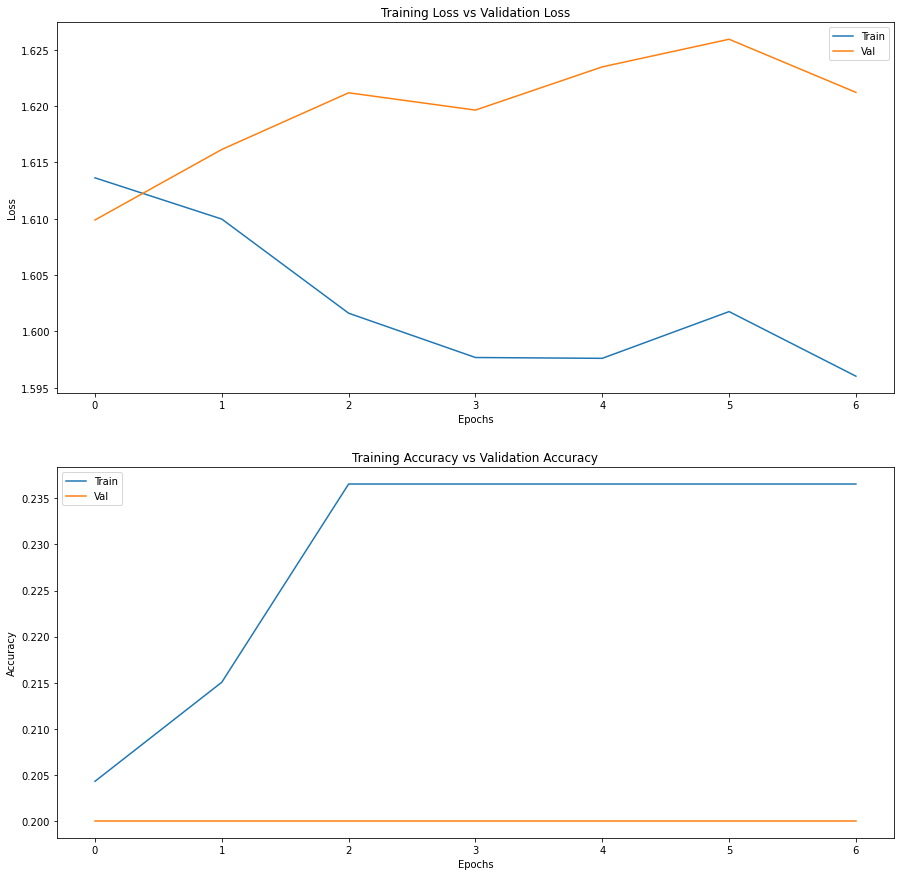

In [6]:
fig, axs = plt.subplots(2, 1, figsize=(15,15))

axs[0].plot(history.history['loss'])
axs[0].plot(history.history['val_loss'])
axs[0].title.set_text('Training Loss vs Validation Loss')
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Loss')
axs[0].legend(['Train', 'Val'])

axs[1].plot(history.history['accuracy'])
axs[1].plot(history.history['val_accuracy'])
axs[1].title.set_text('Training Accuracy vs Validation Accuracy')
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Accuracy')
axs[1].legend(['Train', 'Val'])

In [7]:
model.evaluate(valx, valy)

1/1 [==============================] - 0s 176ms/step - loss: 1.6212 - accuracy: 0.2000


[1.621219277381897, 0.20000000298023224]